---
title: "IMDB Analysis of WWE RAW Television Ratings and Viewer Trends"
author: "Noah and Will"
date: today
format:
  html:
    code-fold: true
    theme: lux
fig-cap: "This is working"
fig-label: "fig-label-to-make-reference"
---


# Introduction

The purpose of this analysis is to explore **IMDB ratings and viewer trends**

In this project, we aim to:
- Check the popularities of genres over the years
- Visualize key patterns using data-driven techniques.

By combining IMDB data with trend analysis, we hope to uncover meaningful insights into the evolution of movie view's habits. 


In [34]:
%matplotlib inline

In [35]:
import pandas as pd

df = pd.read_csv("IMDb_Economist_tv_ratings.csv")

In [36]:
df.head(5)


,titleId,seasonNumber,title,date,av_rating,share,genres
0,tt2879552,1,11.22.63,2016-03-10,8.4890,0.51,"Drama,Mystery,Sci-Fi"
1,tt3148266,1,12 Monkeys,2015-02-27,8.3407,0.46,"Adventure,Drama,Mystery"
2,tt3148266,2,12 Monkeys,2016-05-30,8.8196,0.25,"Adventure,Drama,Mystery"
3,tt3148266,3,12 Monkeys,2017-05-19,9.0369,0.19,"Adventure,Drama,Mystery"
4,tt3148266,4,12 Monkeys,2018-06-26,9.1363,0.38,"Adventure,Drama,Mystery"


In [37]:
# Tranform dates to datetime objects

df["date"] = pd.to_datetime(df["date"])

In [38]:
# extract the year from datetime object

df["year"] = df["date"].dt.year

In [39]:
# all genres of individual rows

df["genres"] = df["genres"].str.split(",")
df = df.explode("genres")

In [40]:
# best performing genres over the years

genre_year_perf = df.groupby(["year", "genres", "title"])["av_rating"].mean().reset_index()

genre_year_perf.head(5)

,year,genres,title,av_rating
0,1990,Action,Quantum Leap,7.8790
1,1990,Adventure,Quantum Leap,7.8790
2,1990,Adventure,Walt Disney's Wonderful World of Color,7.7353
3,1990,Biography,Walt Disney's Wonderful World of Color,7.7353
4,1990,Comedy,American Playhouse,7.9000


In [41]:
year_perf = df.groupby(["year", "title", "genres"])["av_rating"].mean().reset_index()

year_perf.head(10)

,year,title,genres,av_rating
0,1990,American Playhouse,Comedy,7.90000
1,1990,American Playhouse,Drama,7.90000
2,1990,American Playhouse,Romance,7.90000
3,1990,Blossom,Comedy,6.80000
4,1990,Blossom,Drama,6.80000
5,1990,Blossom,Family,6.80000
6,1990,Cheers,Comedy,7.68255
7,1990,Cheers,Drama,7.68255
8,1990,Columbo,Crime,7.37750
9,1990,Columbo,Drama,7.37750


In [42]:
# Get top 5 rated per year

top5 = year_perf.groupby("year").apply(
    lambda g: g.nlargest(5, "av_rating")
).reset_index(drop=True)

top5.tail(10)

,year,title,genres,av_rating
135,2017,Kingdom,Drama,9.3769
136,2017,Game of Thrones,Action,9.3014
137,2017,Game of Thrones,Adventure,9.3014
138,2017,Game of Thrones,Drama,9.3014
139,2017,Mr. Robot,Crime,9.2800
140,2018,BoJack Horseman,Animation,9.4738
141,2018,BoJack Horseman,Comedy,9.4738
142,2018,BoJack Horseman,Drama,9.4738
143,2018,The Americans,Crime,9.2232
144,2018,The Americans,Drama,9.2232


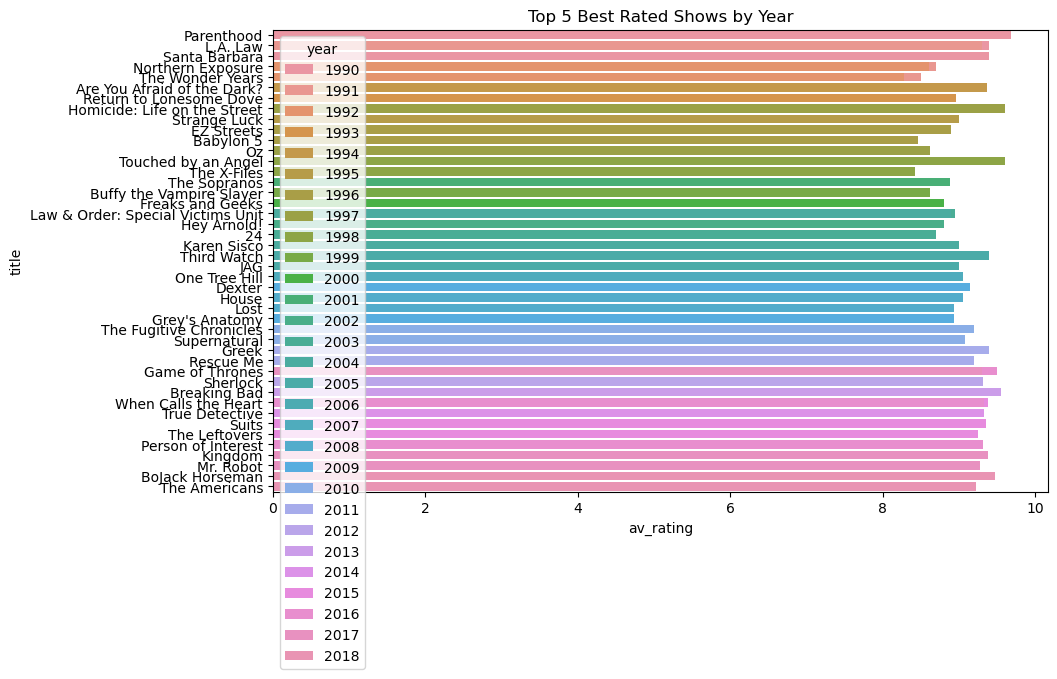

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=top5, x="av_rating", y="title", hue="year", dodge=False)
plt.title("Top 5 Best Rated Shows by Year")
plt.show()

# | label: fig-label-to-make-reference
# | fig-cap: "Short explanation"

In [47]:
# Average rating of genres over all the years

mean_genres = year_perf.groupby(['genres'])['av_rating'].mean().reset_index()

mean_genres.head(20)

mean_genres.columns


Index(['genres', 'av_rating'], dtype='object')

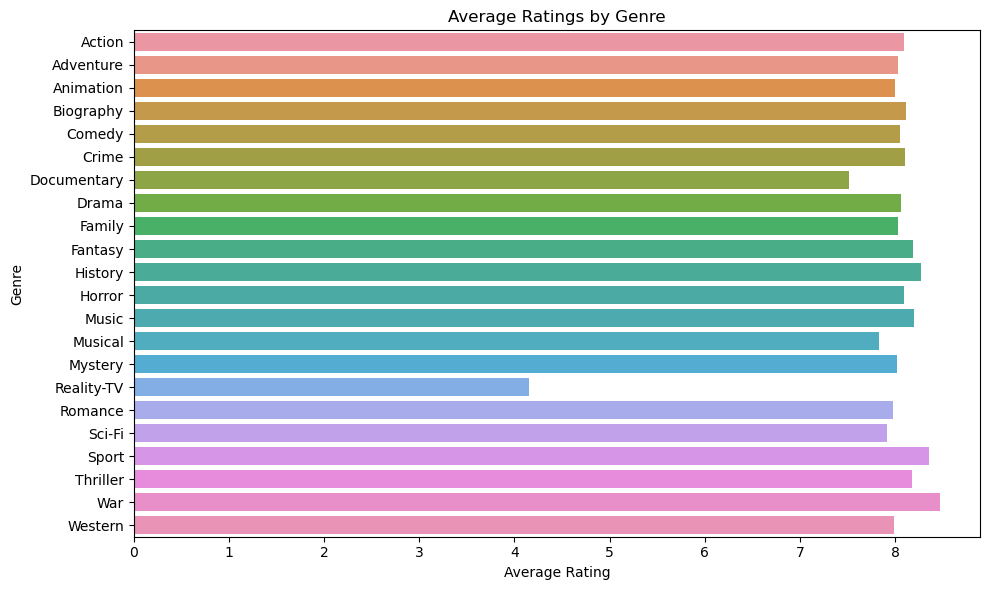

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(data=mean_genres, x="av_rating", y="genres", dodge=False)
plt.title("Average Ratings by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


In [51]:
# average rating of genres by year
mean_genres_year = df.groupby(["year", "genres"])["av_rating"].mean().reset_index()
mean_genres_year = mean_genres_year.sort_values(by=["year", "av_rating"], ascending=[True, False])


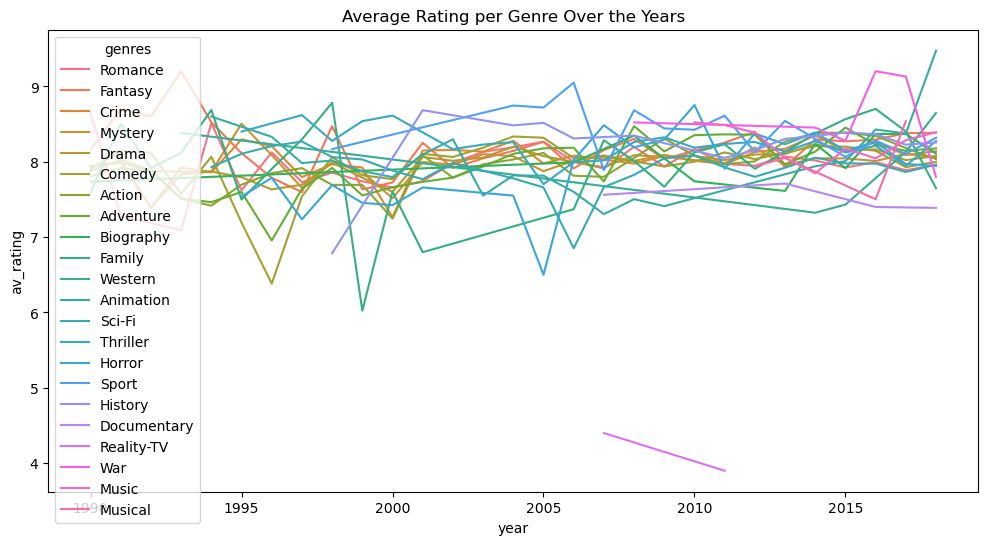

In [53]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_genres_year, x="year", y="av_rating", hue="genres")
plt.title("Average Rating per Genre Over the Years")
plt.show()


Need to work on colours for easy clarification